In [120]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [121]:
# Drawing helper functions

def show_image(im):
    rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_im)
    plt.show()

def draw_circles(im, circles, color):
    if circles is not None:
        circ_arr = np.uint16(np.around(circles))
        for x, y, r in circ_arr[0, :]:
            cv2.circle(im, (x, y), r, color, 3)

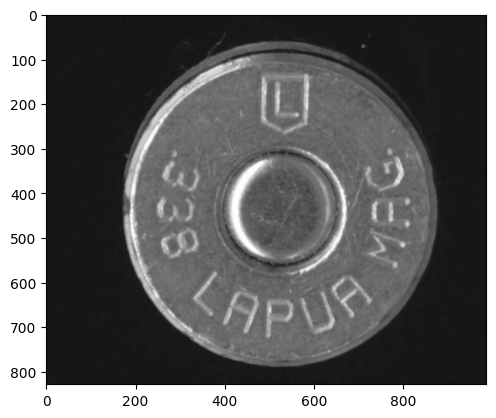

In [122]:
img = cv2.imread("./6e10254a-e7ff-41a3-9a17-8b15101bc10c.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_image(gray_img)

[[[526.5 440.5 145. ]]]
[[[521.5 434.5 353.4]
  [548.5 450.5 354.5]
  [507.5 461.5 324.1]
  [517.5 399.5 340.6]
  [492.5 427.5 303.5]]]


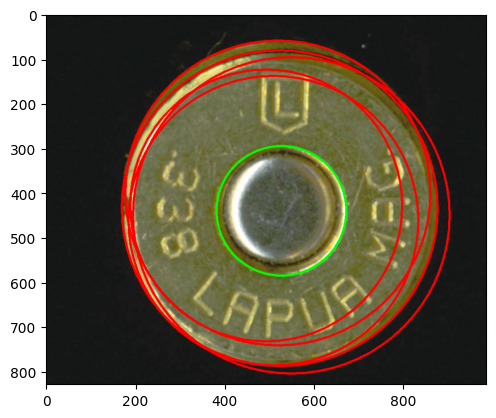

In [123]:
gray_img = cv2.medianBlur(gray_img, 5)

inner_circles = cv2.HoughCircles(gray_img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=gray_img.shape[0] / 32, circles=None, param1=100, param2=100, minRadius=50, maxRadius=150)
print(inner_circles)

outer_circles = cv2.HoughCircles(gray_img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=gray_img.shape[0] / 32, circles=None, param1=100, param2=100, minRadius=150, maxRadius=0)
print(outer_circles)

output = img.copy()
draw_circles(output, inner_circles, (0, 255, 0))
draw_circles(output, outer_circles, (0, 0, 255))
show_image(output)

(526, 440) 145


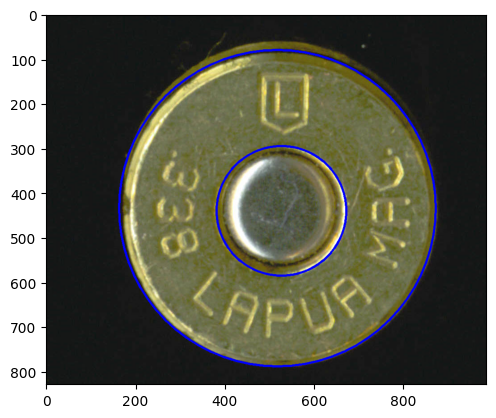

In [124]:
output = img.copy()

inner = np.array(inner_circles)[0]
inner_center = (np.mean(inner[:,0]).astype(np.uint16), np.mean(inner[:,1]).astype(np.uint16))
inner_radius = np.min(inner[:,2]).astype(np.uint16)
print(inner_center, inner_radius)

outer = np.array(outer_circles)[0]
outer_center = (np.mean(outer[:,0]).astype(np.uint16), np.mean(outer[:,1]).astype(np.uint16))
outer_radius = np.max(outer[:,2]).astype(np.uint16)

draw_circles(output, [[[inner_center[0], inner_center[1], inner_radius]]], (255, 0, 0))
draw_circles(output, [[[outer_center[0], outer_center[1], outer_radius]]], (255, 0, 0))
show_image(output)

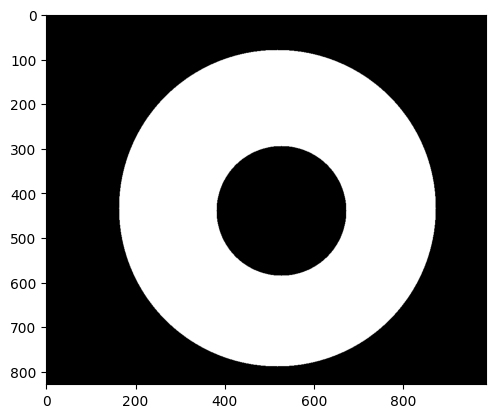

In [125]:
inner_mask = np.zeros_like(img)
inner_mask = cv2.circle(inner_mask, inner_center, inner_radius, (255,255,255), -1)

outer_mask = np.zeros_like(img)
outer_mask = cv2.circle(outer_mask, outer_center, outer_radius, (255,255,255), -1)

headstamp_mask = cv2.subtract(outer_mask, inner_mask)

show_image(headstamp_mask)

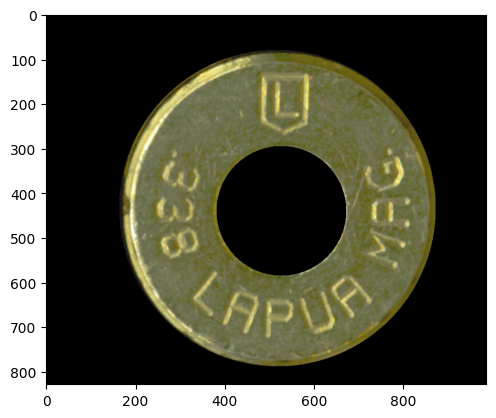

In [126]:
masked = img.copy()
masked[headstamp_mask != 255] = 0

show_image(masked)

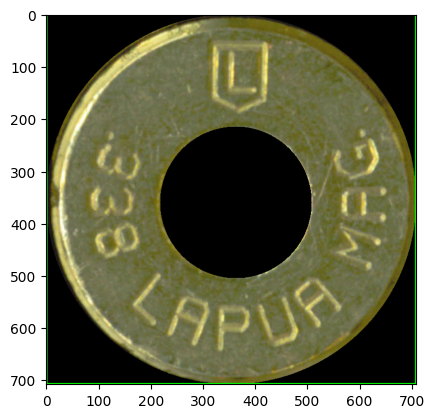

In [132]:
min_x, min_y = outer_center - outer_radius
max_x, max_y = outer_center + outer_radius

cropped = masked[min_y:max_y, min_x:max_x, :]

show_image(cropped)

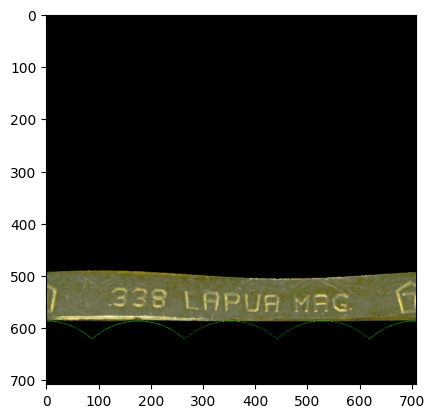

In [157]:
rotated = cv2.rotate(cropped, cv2.ROTATE_90_CLOCKWISE)
polar = cv2.logPolar(rotated, (outer_radius, outer_radius), 100, cv2.WARP_FILL_OUTLIERS)
polar_rotated = cv2.rotate(polar, cv2.ROTATE_90_CLOCKWISE)

show_image(polar_rotated)